# Model from scratch

Description:

This is a convolutional neural network (CNN) built using the Keras library in TensorFlow.

The network architecture consists of several convolutional layers, followed by max pooling and batch normalization layers, and fully connected layers at the end.

- Input Layer: The input shape for the network is (224, 224, 3), representing RGB images of size 224x224 pixels.

- Convolutional Layers: The network starts with a Conv2D layer with 32 filters, each using a 3x3 kernel and ReLU activation function. Another Conv2D layer with 32 filters follows, also using a 3x3 kernel and ReLU activation. Both of these convolutional layers have 'same' padding to preserve the spatial dimensions of the input.
- Max pooling with a 2x2 pool size is applied after each of these convolutional layers to reduce spatial dimensions.

- Batch Normalization: Batch normalization layers are inserted after each max pooling layer to normalize the activations and improve network performance.

- Additional Convolutional Layers: The above pattern of convolutional layers followed by max pooling and batch normalization is repeated with increased complexity. Two more pairs of Conv2D layers are added, with 64 filters each, and then 128 filters each, using 3x3 kernels, ReLU activation, and 'same' padding. Max pooling and batch normalization layers are applied after each pair.

- Dense Layers: The output from the previous layers is flattened and fed into a dense (fully connected) layer with 512 units and ReLU activation. A dropout layer with a rate of 0.5 is added after this dense layer to prevent overfitting. Another dense layer with 256 units and ReLU activation follows, again with a dropout rate of 0.5.
- Output Layer: The final dense layer consists of num_classes (5 in this case) units, representing the number of classes in the classification task. The activation function used is softmax to obtain class probabilities.

- Optimizer and Loss: The Adam optimizer is used with a learning rate of 0.0001. The loss function used is categorical cross-entropy, suitable for multi-class classification tasks.

The model is trained using the ImageDataGenerator class for data augmentation, which performs random transformations on the training images to improve generalization. The training is performed for 40 epochs, and the model's performance is evaluated on the validation set after each epoch.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import urllib.request
import tarfile

# URL del dataset
url = "http://download.tensorflow.org/example_images/flower_photos.tgz"

# Percorso di destinazione per il download
file_name = "flower_photos.tgz"

# Download del file
urllib.request.urlretrieve(url, file_name)

# Estrazione del file
tar = tarfile.open(file_name)
tar.extractall()
tar.close()

**Import libraries**

In [3]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
import random as python_random
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from time import time
np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

**Split folder for train(70%), validation (20%) and test set (10%)**

In [4]:
!pip install split-folders
import splitfolders
splitfolders.ratio('flower_photos', output="output", seed=1337, ratio=(0.7, 0.2, 0.1))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 3670 files [00:01, 3301.72 files/s]


**Define the paths to train, validation and test folders**

In [5]:
path_train='/content/output/train/'
path_val='/content/output/val/'
path_test='/content/output/test/'

**Define train, validation, test variables**

In [6]:
train_dataset = keras.preprocessing.image_dataset_from_directory(path_train,
                                                                 image_size=(224,224),
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 validation_split = False,
                                                                 shuffle=True,
                                                                 seed=1)

Found 2567 files belonging to 5 classes.


In [7]:
val_dataset = keras.preprocessing.image_dataset_from_directory(path_val,
                                                                 image_size=(224,224),
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 validation_split = False,
                                                                 shuffle=True,
                                                                 seed=1)

Found 731 files belonging to 5 classes.


In [8]:
test_dataset = keras.preprocessing.image_dataset_from_directory(path_test,
                                                                 image_size=(224,224),
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 validation_split = False,
                                                                 shuffle=True,
                                                                 seed=1)

Found 372 files belonging to 5 classes.


**Visualizing class_names**

In [9]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Data augmentation**

In [10]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

**Define the number of classes**

In [11]:
num_classes=5

**Architecture from scratch**

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)  # Fissa il seed per la riproducibilità dei risultati

# Dimensioni delle immagini di input
input_shape = (224, 224, 3)

# Numero di classi (categorie di immagini nel dataset)
num_classes = 5


# Imposta i generatori di dati
batch_size = 32


# Definisci il percorso dei dati
data_dir = '/content/output'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/val'
test_dir = data_dir + '/test'
# Crea i generatori di immagini per l'addestramento e la validazione senza data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
# Imposta i generatori di dati

val_generator = val_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
# Crea i generatori di immagini per l'addestramento e la validazione con data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)
# Crea il modello
model_scratch = Sequential()
model_scratch.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model_scratch.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
model_scratch.add(BatchNormalization())

model_scratch.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_scratch.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
model_scratch.add(BatchNormalization())

model_scratch.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_scratch.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
model_scratch.add(BatchNormalization())

model_scratch.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_scratch.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_scratch.add(MaxPooling2D(pool_size=(2, 2)))
model_scratch.add(BatchNormalization())


model_scratch.add(Flatten())
model_scratch.add(Dense(512, activation='relu'))
model_scratch.add(Dropout(0.5))
model_scratch.add(Dense(256, activation='relu'))

model_scratch.add(Dropout(0.5))
model_scratch.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(learning_rate=0.0001)  # Prova con Adam

model_scratch.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Addestra il modello
history = model_scratch.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator
)


Found 731 images belonging to 5 classes.
Found 372 images belonging to 5 classes.
Found 2567 images belonging to 5 classes.
Epoch 1/40
81/81 [==============================] - 75s 634ms/step - loss: 2.4901 - accuracy: 0.3487 - val_loss: 2.1079 - val_accuracy: 0.2449
Epoch 2/40
81/81 [==============================] - 50s 618ms/step - loss: 1.6908 - accuracy: 0.4270 - val_loss: 3.0692 - val_accuracy: 0.2449
Epoch 3/40
81/81 [==============================] - 54s 666ms/step - loss: 1.4609 - accuracy: 0.4671 - val_loss: 3.4772 - val_accuracy: 0.2449
Epoch 4/40
81/81 [==============================] - 51s 627ms/step - loss: 1.3866 - accuracy: 0.4803 - val_loss: 2.3115 - val_accuracy: 0.2449
Epoch 5/40
81/81 [==============================] - 45s 556ms/step - loss: 1.3130 - accuracy: 0.5045 - val_loss: 2.7060 - val_accuracy: 0.2449
Epoch 6/40
81/81 [==============================] - 42s 523ms/step - loss: 1.2755 - accuracy: 0.5201 - val_loss: 1.7581 - val_accuracy: 0.3352
Epoch 7/40
81/81 [

**Train and Validation plots**

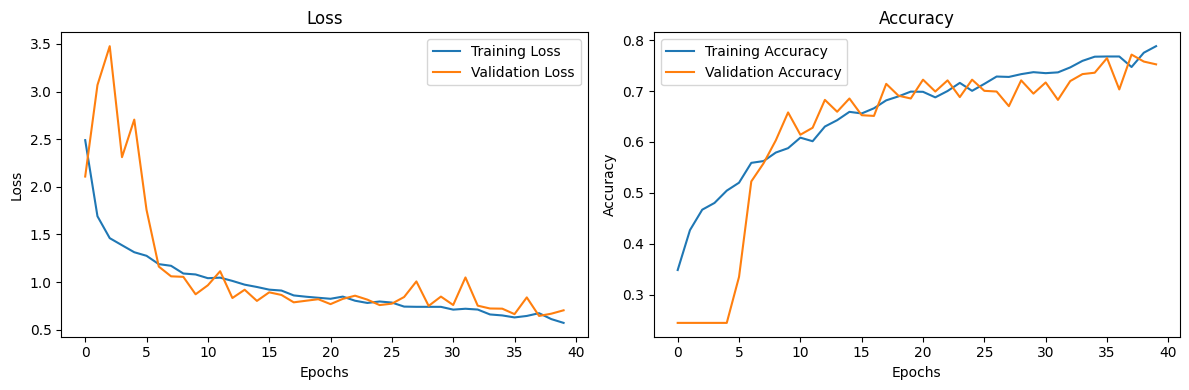

In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Crea i plot per la loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Crea i plot per l'accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Mostra i plot
plt.tight_layout()
plt.show()

**Evaluation**

In [14]:
loss, accuracy = model_scratch.evaluate(test_generator)

12/12 [==============================] - 3s 229ms/step - loss: 0.7895 - accuracy: 0.7392


In [15]:
model_scratch.save('drive/MyDrive/model_scratchConv2D.h5')

**Number of missclassified images**

In [16]:
errate = 0
total_images = 0
batch_size = test_generator.batch_size

for images, labels in test_generator:
    predictions = model_scratch.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    errate += np.sum(predicted_labels != true_labels)
    total_images += len(images)
    print(total_images)
    if total_images >= len(test_generator)*batch_size-len(test_generator):
        # Tutte le immagini di test sono state processate
        break

print("Numero di immagini classificate erroneamente:", errate)
print("Numero totale di immagini:", total_images)

1/1 [==============================] - 0s 198ms/step
32
1/1 [==============================] - 0s 32ms/step
64
1/1 [==============================] - 0s 29ms/step
96
1/1 [==============================] - 0s 29ms/step
128
1/1 [==============================] - 0s 29ms/step
160
1/1 [==============================] - 0s 31ms/step
192
1/1 [==============================] - 0s 31ms/step
224
1/1 [==============================] - 0s 37ms/step
256
1/1 [==============================] - 0s 29ms/step
288
1/1 [==============================] - 0s 31ms/step
320
1/1 [==============================] - 0s 32ms/step
352
1/1 [==============================] - 0s 163ms/step
372
Numero di immagini classificate erroneamente: 97
Numero totale di immagini: 372


**Visualize the missclassified images**

1/1 [==============================] - 0s 369ms/step


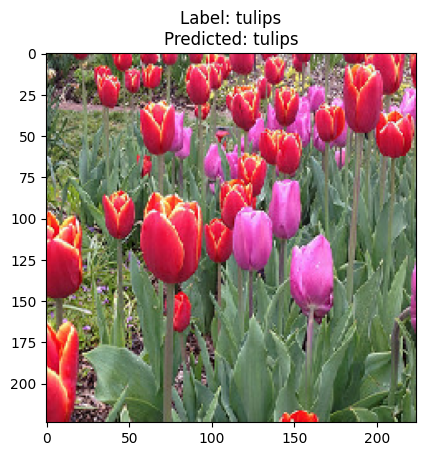

1/1 [==============================] - 0s 28ms/step


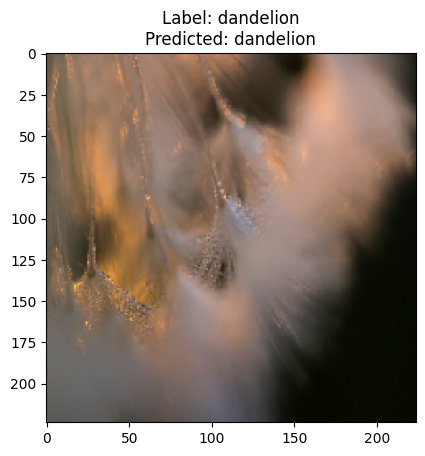

1/1 [==============================] - 0s 26ms/step


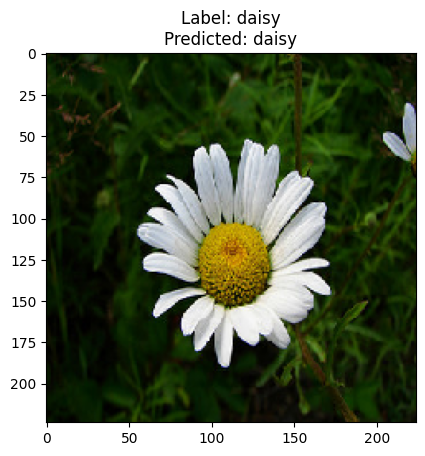

1/1 [==============================] - 0s 32ms/step


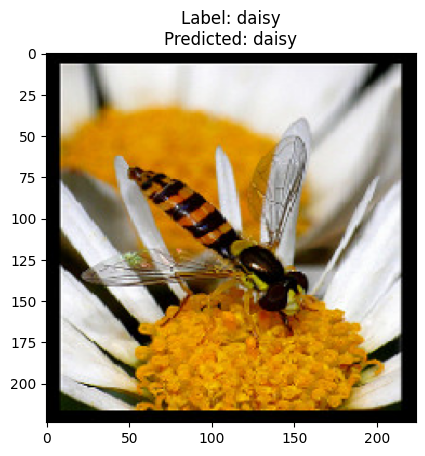

1/1 [==============================] - 0s 25ms/step


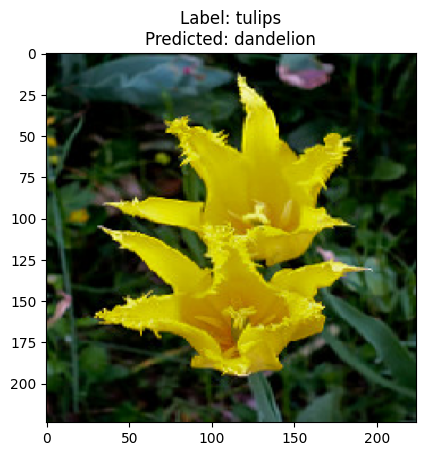

1/1 [==============================] - 0s 29ms/step


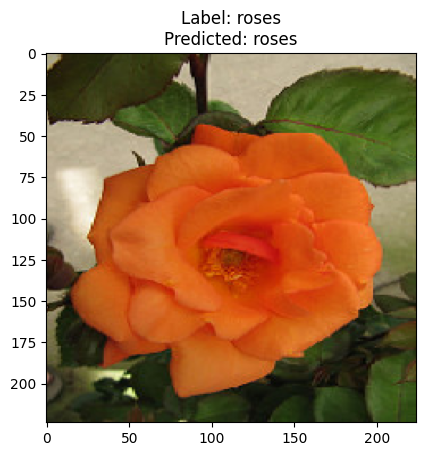

1/1 [==============================] - 0s 29ms/step


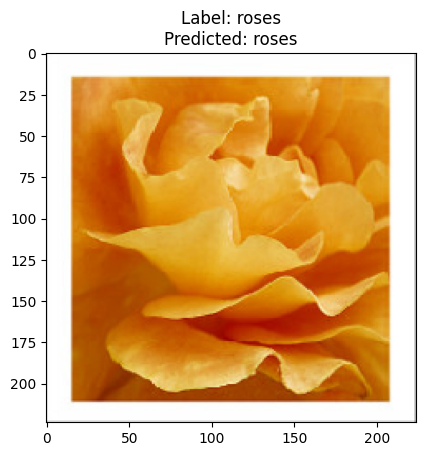

1/1 [==============================] - 0s 24ms/step


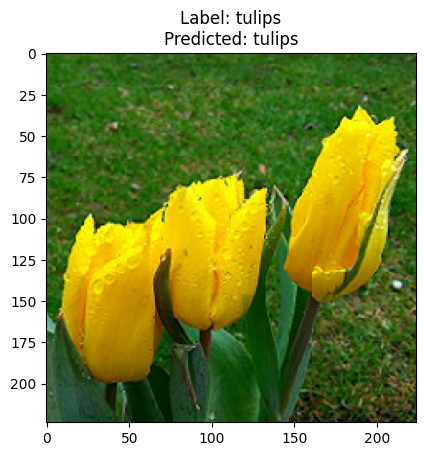

1/1 [==============================] - 0s 27ms/step


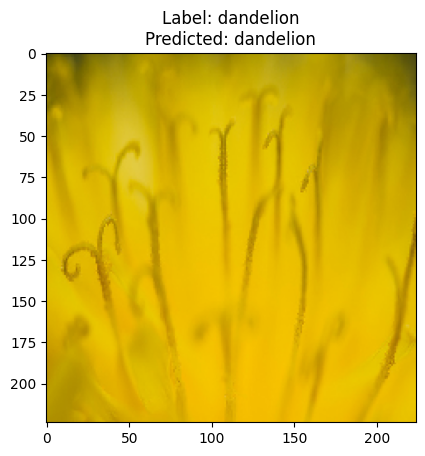

1/1 [==============================] - 0s 27ms/step


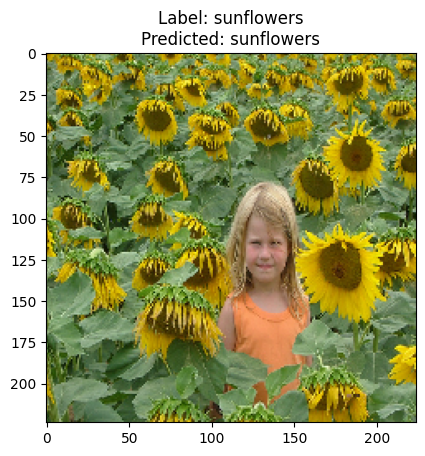

In [17]:
count = 0

for images, labels in test_generator:
    for i in range(min(10, images.shape[0])):
        predictions = model_scratch.predict(tf.expand_dims(images[i], 0))
        predicted_label = class_names[np.argmax(predictions)]

        plt.imshow(images[i])
        plt.title("Label: " + class_names[np.argmax(labels[i])] + "\nPredicted: " + predicted_label)
        plt.show()

        count += 1

        if count == 10:
            break

    if count == 10:
        break
